### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


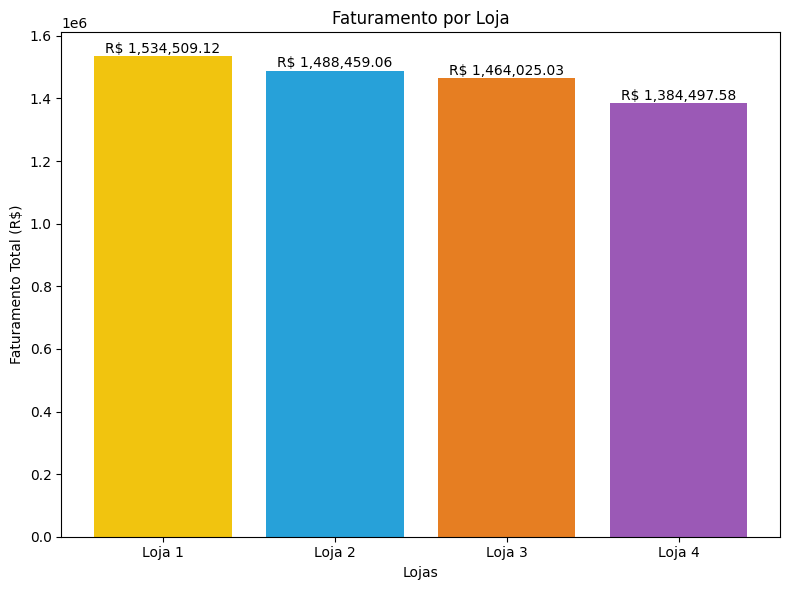

In [ ]:
import matplotlib.pyplot as plt

# Conversão #
loja["preco"]  = pd.to_numeric(loja["preco"], errors="coerce")
loja2["preco"] = pd.to_numeric(loja2["preco"], errors="coerce")
loja3["preco"] = pd.to_numeric(loja3["preco"], errors="coerce")
loja4["preco"] = pd.to_numeric(loja4["preco"], errors="coerce")

# Faturamento #
faturamentoLoja1 = loja["preco"].sum()
faturamentoLoja2 = loja2["preco"].sum()
faturamentoLoja3 = loja3["preco"].sum()
faturamentoLoja4 = loja4["preco"].sum()

# Listas para gráfico #
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamentoLoja4]

# Gráfico #
plt.figure(figsize=(8,6))
plt.bar(lojas, faturamento, color=["#f1c40f", "#27a1d9", "#e67e22", "#9b59b6"])

# Rótulos #
for i, valor in enumerate(faturamento):
    plt.text(i, valor + 2000, f"R$ {valor:,.2f}", ha="center", va="bottom", fontsize=10)

# Título #
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento por Loja")
plt.tight_layout()
plt.show()

In [ ]:
print("Faturamento por Loja:")
print(f"Loja 1: R$ {faturamentoLoja1:,.2f}")
print(f"Loja 2: R$ {faturamentoLoja2:,.2f}")
print(f"Loja 3: R$ {faturamentoLoja3:,.2f}")
print(f"Loja 4: R$ {faturamentoLoja4:,.2f}")


Faturamento por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria



Faturamento por Categoria - Loja 1:
eletronicos: R$ 572,659.23
eletrodomesticos: R$ 484,913.36
moveis: R$ 250,178.11
instrumentos musicais: R$ 121,731.69
esporte e lazer: R$ 52,387.55
brinquedos: R$ 23,993.78
utilidades domesticas: R$ 16,931.48
livros: R$ 11,713.92


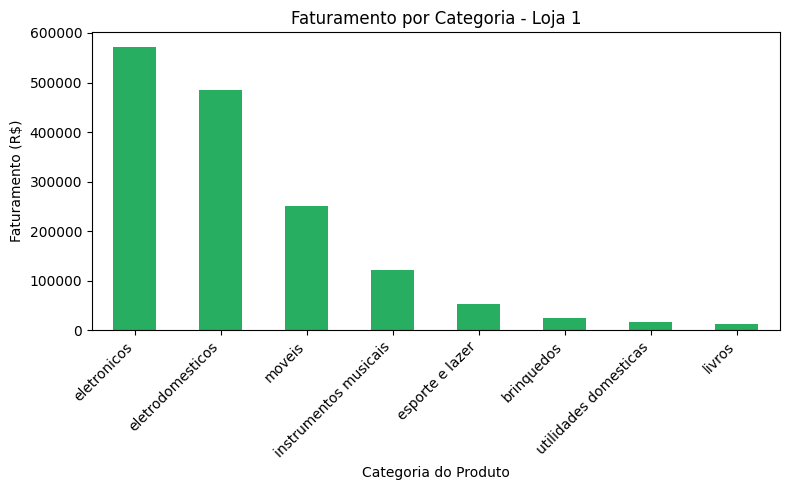


Faturamento por Categoria - Loja 2:
eletronicos: R$ 547,773.71
eletrodomesticos: R$ 464,758.13
moveis: R$ 235,234.68
instrumentos musicais: R$ 139,987.03
esporte e lazer: R$ 46,326.09
brinquedos: R$ 21,262.21
utilidades domesticas: R$ 19,662.86
livros: R$ 13,454.35


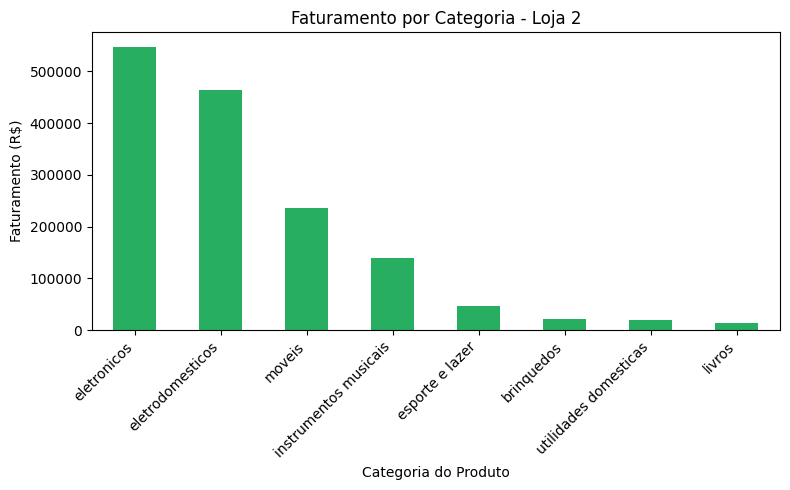


Faturamento por Categoria - Loja 3:
eletronicos: R$ 547,699.92
eletrodomesticos: R$ 438,984.89
moveis: R$ 268,095.56
instrumentos musicais: R$ 103,174.45
esporte e lazer: R$ 47,456.10
brinquedos: R$ 25,869.20
utilidades domesticas: R$ 20,080.21
livros: R$ 12,664.70


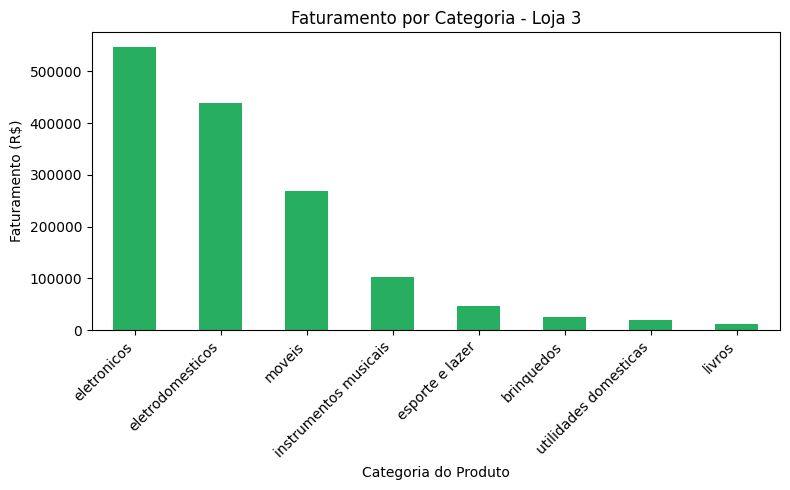


Faturamento por Categoria - Loja 4:
eletronicos: R$ 545,966.86
eletrodomesticos: R$ 377,680.65
moveis: R$ 256,705.65
instrumentos musicais: R$ 100,136.50
esporte e lazer: R$ 44,465.65
brinquedos: R$ 27,015.67
utilidades domesticas: R$ 20,098.83
livros: R$ 12,427.77


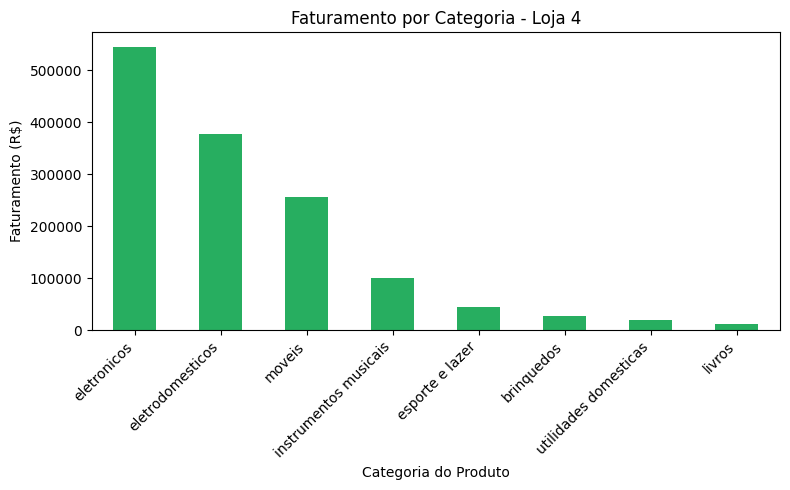

In [ ]:
# Lista das lojas #
lojas_dfs = [
    (loja,  "Loja 1"),
    (loja2, "Loja 2"),
    (loja3, "Loja 3"),
    (loja4, "Loja 4")
]

# Loop para cada loja #
for df_loja, nome_loja in lojas_dfs:
    print(f"\nFaturamento por Categoria - {nome_loja}:")
    faturamento_cat = df_loja.groupby("categoria do produto")["preco"].sum().sort_values(ascending=False)

    # Print #
    for categoria, valor in faturamento_cat.items():
        print(f"{categoria}: R$ {valor:,.2f}")

    # Gráfico #
    plt.figure(figsize=(8,5))
    faturamento_cat.plot(kind="bar", color="#27ae60")
    plt.title(f"Faturamento por Categoria - {nome_loja}")
    plt.xlabel("Categoria do Produto")
    plt.ylabel("Faturamento (R$)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# 3. Média de Avaliação das Lojas

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


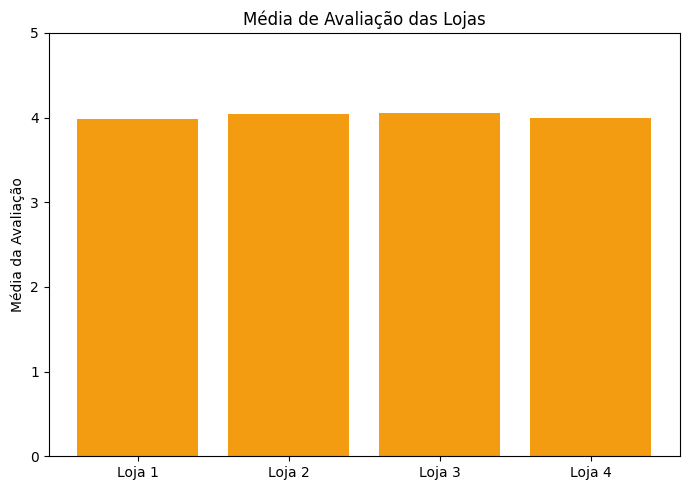

In [ ]:
# Lista #
lojas_dfs = [
    (loja,  "Loja 1"),
    (loja2, "Loja 2"),
    (loja3, "Loja 3"),
    (loja4, "Loja 4")
]

# Média de avaliação #
avaliacoes_medias = {}
for df_loja, nome_loja in lojas_dfs:
    media = df_loja["avaliacao da compra"].mean()
    avaliacoes_medias[nome_loja] = media
    print(f"{nome_loja}: {media:.2f}")

# Criar gráfico #
plt.figure(figsize=(7,5))
plt.bar(avaliacoes_medias.keys(), avaliacoes_medias.values(), color="#f39c12")
plt.ylabel("Média da Avaliação")
plt.ylim(0, 5)
plt.title("Média de Avaliação das Lojas")
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

--- Análise do Produto Mais e Menos Vendido por Loja ---

Resultados para a Loja 1:
  - Mais Vendido: 'Micro-ondas' (com 60 unidades)
  - Menos Vendido: 'Celular ABXY' (com 33 unidades)

Resultados para a Loja 2:
  - Mais Vendido: 'Iniciando em programação' (com 65 unidades)
  - Menos Vendido: 'Jogo de tabuleiro' (com 32 unidades)

Resultados para a Loja 3:
  - Mais Vendido: 'Kit banquetas' (com 57 unidades)
  - Menos Vendido: 'Blocos de montar' (com 35 unidades)

Resultados para a Loja 4:
  - Mais Vendido: 'Cama box' (com 62 unidades)
  - Menos Vendido: 'Guitarra' (com 33 unidades)


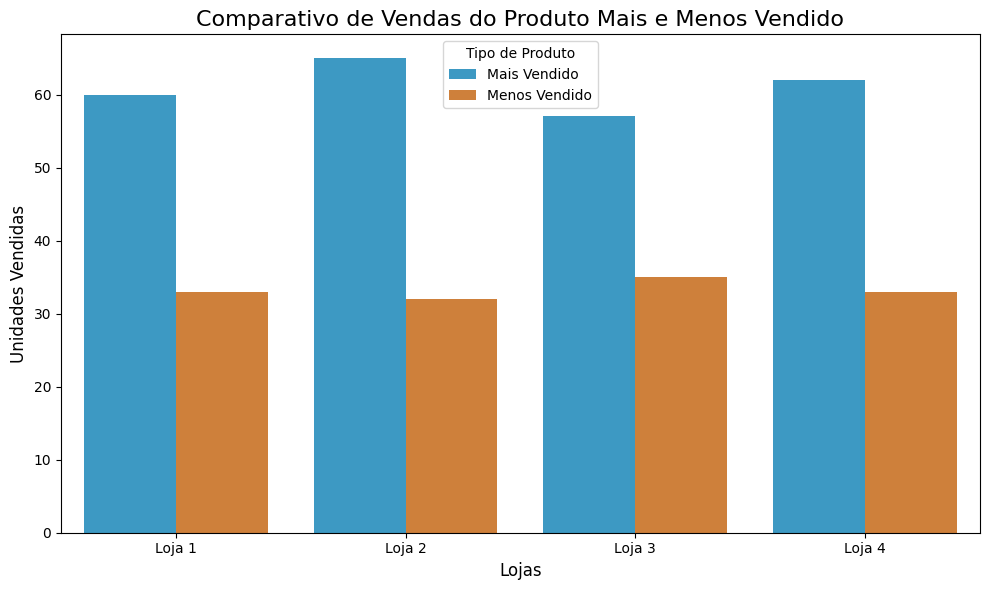

In [ ]:
import seaborn as sns

lojas_dfs = [
    (loja, "Loja 1"),
    (loja2, "Loja 2"),
    (loja3, "Loja 3"),
    (loja4, "Loja 4")
]

lista_resultados = []

print("--- Análise do Produto Mais e Menos Vendido por Loja ---")

# Análise de lojas #
for df_loja, nome_loja in lojas_dfs:

    contagem_de_produtos = df_loja['produto'].value_counts()

    # --- Produto Mais Vendido --- #
    produto_mais_vendido = contagem_de_produtos.index[0]
    quantidade_mais_vendido = contagem_de_produtos.iloc[0]

    # --- Produto Menos Vendido --- #
    produto_menos_vendido = contagem_de_produtos.index[-1]
    quantidade_menos_vendido = contagem_de_produtos.iloc[-1]

    # resultados #
    print(f"\nResultados para a {nome_loja}:")
    print(f"  - Mais Vendido: '{produto_mais_vendido}' (com {quantidade_mais_vendido} unidades)")
    print(f"  - Menos Vendido: '{produto_menos_vendido}' (com {quantidade_menos_vendido} unidades)")

    lista_resultados.append({'Loja': nome_loja, 'Tipo': 'Mais Vendido', 'Quantidade': quantidade_mais_vendido})
    lista_resultados.append({'Loja': nome_loja, 'Tipo': 'Menos Vendido', 'Quantidade': quantidade_menos_vendido})


# Converter a lista com o pandas #
df_resultados = pd.DataFrame(lista_resultados)

# Criar a figura do gráfico #
plt.figure(figsize=(10, 6))

# Gráfico com seaborn #
sns.barplot(data=df_resultados, x='Loja', y='Quantidade', hue='Tipo', palette=['#27a1d9', '#e67e22'])

# Adicionar títulos #
plt.title('Comparativo de Vendas do Produto Mais e Menos Vendido', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend(title='Tipo de Produto')
plt.tight_layout()

# Mostrar o gráfico #
plt.show()

# 5. Frete Médio por Loja


--- Análise do Frete Médio por Loja ---
O frete médio para a Loja 1 é de R$ 34.69
O frete médio para a Loja 2 é de R$ 33.62
O frete médio para a Loja 3 é de R$ 33.07
O frete médio para a Loja 4 é de R$ 31.28


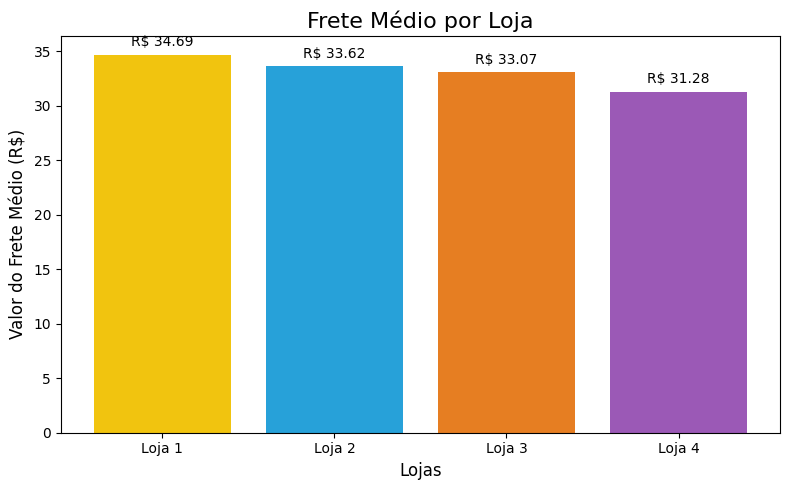

In [ ]:
lojas_dfs = [
    (loja, "Loja 1"),
    (loja2, "Loja 2"),
    (loja3, "Loja 3"),
    (loja4, "Loja 4")
]

fretes_medios = {}

print("--- Análise do Frete Médio por Loja ---")

# Loop para analisar cada loja #
for df_loja, nome_loja in lojas_dfs:

    # Calcular a média do 'frete' #
  media_frete = df_loja['frete'].mean()
  fretes_medios[nome_loja] = media_frete
  print(f"O frete médio para a {nome_loja} é de R$ {media_frete:.2f}")


# Criar figura #
plt.figure(figsize=(8, 5))

# Criar gráfico #
plt.bar(fretes_medios.keys(), fretes_medios.values(), color=['#f1c40f', '#27a1d9', '#e67e22', '#9b59b6'])

# Adicionar o valor #
for i, valor in enumerate(fretes_medios.values()):
    plt.text(i, valor + 0.5, f"R$ {valor:,.2f}", ha="center", va="bottom", fontsize=10)

# Títulos e rótulos #
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Valor do Frete Médio (R$)', fontsize=12)
plt.tight_layout()

# Mostrar o gráfico #
plt.show()


## Relatório:

Após a avaliação das lojas do Sr. João foi possível analisar e mostrar qual loja obteve maior resultado, em outro aspecto, também é possível enxergar qual loja deverá ser vendida por ele.

A loja 1 obteve melhor desempenho geral pelas métricas pedidas e analisadas.
A loja 4 obteve menor desempenho geral pelas métricas pedidas e analisadas.

Com isso, a loja 4 representou menor potencial de lucro e é a loja indicada a venda para o Sr. João.

Porém, mesmo a loja 1 tendo o maior desempenho geral, é evidente, ainda, que seja avaliado a necessidade de melhoria pelo métrica de avaliações da loja, que apresenta um nível inferior pelo lucro dado.